In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re
import math
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import container
from matplotlib import colors
from matplotlib.cm import ScalarMappable
import matplotlib
%matplotlib widget

In [2]:
plt.rcParams['font.size'] = 12

In [3]:
path_R2 = Path('../data/raw/XRD/Re0.1Mo0.9B2_HPXRD_run2_300_20220710/mask&dat&fxye/') #path for Run 2
path_R3 = Path('../data/raw/XRD/Re0.1Mo0.9B2_HPXRD_run3_150_20230228/mask&dat&fxye/') #path for Run 3

In [4]:
data_dict1 = {}

for file in path_R2.iterdir() :
    if str(file).endswith('.dat'):
        file_num = int(re.split('_', str(file.name))[0]) 
        data_dict1[file_num] = pd.read_csv(
        file,
        delimiter='  ',
        usecols=[0, 1],
        skiprows=[0],
        names=['theta2','intensity'], engine = 'python'
        ).dropna()

In [5]:
data_dict2 = {}

for file in path_R3.iterdir() :
    if str(file).endswith('.dat'):
        file_num = int(re.split('_', str(file.name))[0]) 
        data_dict2[file_num] = pd.read_csv(
        file,
        delimiter='  ',
        usecols=[0, 1],
        skiprows=[0],
        names=['theta2','intensity'], engine = 'python'
        ).dropna()

In [6]:
data_dict1 = dict(sorted(data_dict1.items()))
data_dict2 = dict(sorted(data_dict2.items()))

In [7]:
data_dict2.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [8]:
P1 = [0,6,9.5,18,24,28,36,41,47,48,55,59,62,65,68,71,73,56,48,36,25]
P2 = [0,3.6, 12, 24, 31, 37, 43, 45, 48, 52, 56, 62, 69, 77, 84, 91, 98, 104, 109, 114, 119, 123, 
      128, 133, 138, 142, 147, 168, 165, 137]
#pressure values corresponding to the dict keys/file numbers.

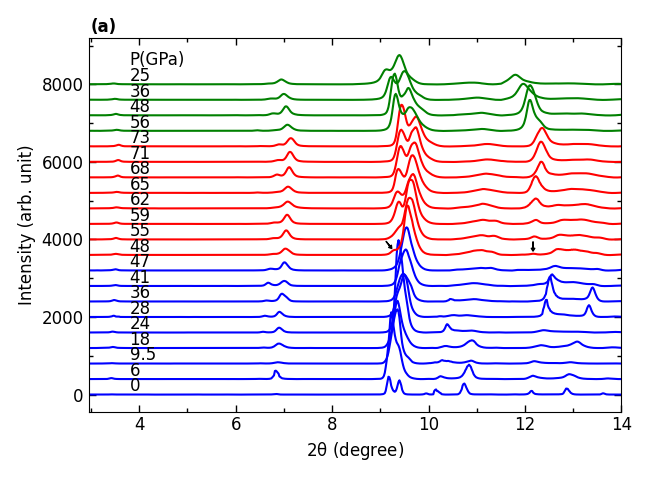

In [61]:
fig, ax = plt.subplots(figsize = (6.5,4.8))
offset =0
i= 0
for file in data_dict1.keys(): #Plotting Unloading data files
        df = data_dict1[file]
        if i < 9:
            ax.plot(df.theta2, df.intensity+offset, color = 'b')
        elif i>=9 and i<17:
            ax.plot(df.theta2, df.intensity+offset, color = 'r')
        else:
            ax.plot(df.theta2, df.intensity+offset, color = 'g')
                    
        ax.text(3.8, 80+offset, P1[i])
        offset = offset+400
        i=i+1;
        
ax.text(3.8, 8500, 'P(GPa)')
ax.text(3,9350,'(a)', fontweight = 'bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = True)
ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = True)
ax.set_xlabel(r'2$\mathrm{\theta}$ (degree)')
ax.set_ylabel('Intensity (arb. unit)')
ax.set_xlim(2.95,14)
prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
ax.annotate("",xy= (12.167,3700),xytext = (12.167, 3941), arrowprops=dict(headwidth=2.5, headlength=2, width=0.02,color ='k'))
ax.annotate("", xy = (9.237,3767), xytext=(9.120,3950), arrowprops = dict(headwidth=2.5, headlength=2, width=0.02,color ='k'))

plt.tight_layout();


In [62]:
plt.savefig('../publication_ready/XRD_Run1.pdf',bbox_inches='tight')

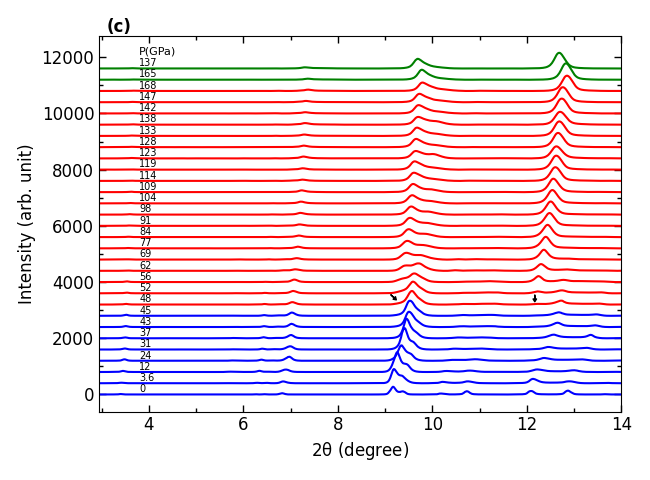

In [59]:
fig, ax = plt.subplots(figsize = (6.5,4.8))
offset =0
i= 0
for file in data_dict2.keys(): #Plotting Unloading data files
        df = data_dict2[file]
        if i < 8:
            ax.plot(df.theta2, df.intensity+offset, color = 'b')
        elif i>=8 and i<28:
            ax.plot(df.theta2, df.intensity+offset, color = 'r')
        else:
            ax.plot(df.theta2, df.intensity+offset, color = 'g')
                    
        ax.text(3.8, 80+offset, P2[i], fontsize = '7')
        offset = offset+400
        i=i+1;
        
ax.text(3.8, 12100, 'P(GPa)',fontsize = '8')       
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = True)
ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = True)
ax.set_xlabel(r'2$\mathrm{\theta}$ (degree)')
ax.set_ylabel('Intensity (arb. unit)')
ax.text(3.1, 12900, '(c)', weight = 'bold')
ax.set_xlim(2.95,14)
prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)
ax.annotate("",xy= (12.167,3300),xytext = (12.167, 3541), arrowprops=dict(headwidth=2.5, headlength=2, width=0.02,color ='k'))
ax.annotate("", xy = (9.237,3367), xytext=(9.120,3550), arrowprops = dict(headwidth=2.5, headlength=2, width=0.02,color ='k'))
plt.tight_layout()

In [60]:
plt.savefig('../publication_ready/XRD_Run2.pdf',bbox_inches='tight')

In [17]:
plt.close('all')

## Contour plotting of XRD

In [53]:
# # between 0 and 1, 0 for the leftmost color of the range, 1 for the rightmost, upper > lower
# n = 20
# min_val = 0.1
# max_val = 1
# orig_cmap = plt.cm.rainbow 
# colors = orig_cmap(np.linspace(min_val, max_val, n))
# c = matplotlib.colors.LinearSegmentedColormap.from_list('cmap', colors)

# between 0 and 1, 0 for the leftmost color of the range, 1 for the rightmost, upper > lower
n = 20
min_val = 0.1
max_val = 0.5
orig_cmap = plt.cm.nipy_spectral
colors = orig_cmap(np.linspace(min_val, max_val, n))
c = matplotlib.colors.LinearSegmentedColormap.from_list('cmap', colors)


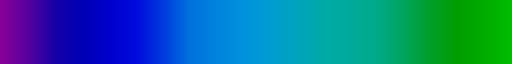

In [54]:
c

In [55]:
#Run 1 Contour plot
Z= []
Y = (data_dict1[1].theta2).array
X = np.array(P1[0:17])
for i in data_dict1.keys():
    if i<18:
        Z.append(data_dict1[i].intensity.array)
    else:
        continue
Z = np.array(Z).transpose()

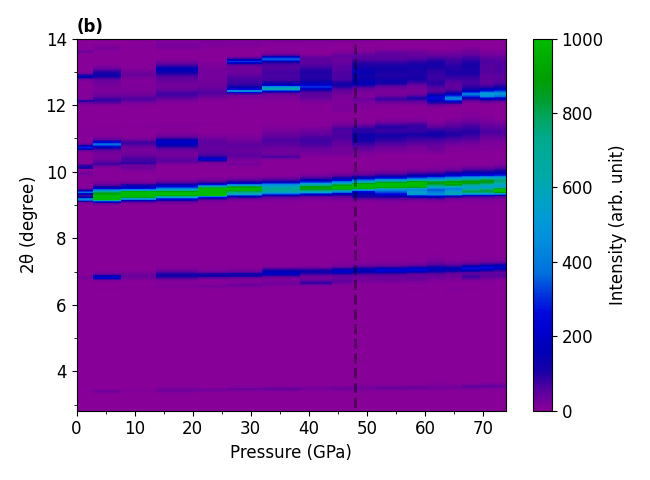

In [56]:
fig,ax = plt.subplots(figsize = (6.5,4.8))


# plots filled contour plot
cf = ax.pcolor(X, Y,Z, vmin = 0, vmax = 1000, cmap = c, rasterized = True) #saving as .pdf puts white grids if raterized = False.  
ax.set_xlabel('Pressure (GPa)')
ax.set_ylabel(r'2$\mathrm{\theta}$ (degree)')
ax.set_ylim(top = 14)
ax.set_xlim(0, 74)
fig.colorbar(cf, ax=ax, ticks= [0, 200, 400, 600, 800, 1000],label = 'Intensity (arb. unit)')
ax.text(0, 14.2, '(b)', weight = 'bold')
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.vlines(48, 0,14,'m','dashed', alpha = 0.4, linewidth = 2, color = 'k') # adding vertical line near the transition
plt.tight_layout()
plt.show()

In [21]:
# j  = 0
# for k in range(Z.shape[0]):
#     for i in range(Z.shape[1]):
#         if Z[k][i] > 800:   
#             j = j+1
#         else:
#             continue
# print(j)

 

In [57]:
plt.savefig('../publication_ready/Contour_Run1.pdf',bbox_inches='tight')

In [58]:
plt.close('all')

### Run 2 contour plotting

In [35]:
# between 0 and 1, 0 for the leftmost color of the range, 1 for the rightmost, upper > lower
n = 20
min_val = 0.1
max_val = 0.8
orig_cmap = plt.cm.nipy_spectral
colors = orig_cmap(np.linspace(min_val, max_val, n))
c = matplotlib.colors.LinearSegmentedColormap.from_list('cmap', colors)


In [36]:
#Run 2 Contour plot
Z= []
Y = (data_dict2[1].theta2).array
X = np.array(P2[0:28])
for i in data_dict2.keys():
    if i<29:
        Z.append(data_dict2[i].intensity.array)
    else:
        continue
Z = np.array(Z).transpose()

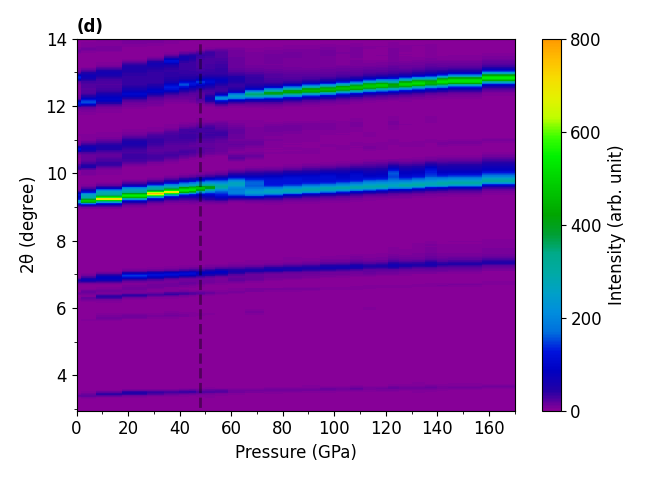

In [44]:
fig,ax = plt.subplots(figsize = (6.5,4.8))
ax.text(0,14.2,'(d)',fontweight = 'bold')

# plots filled contour plot
cf = ax.pcolor(X, Y,Z, vmin = 0, vmax = 800,cmap = c,rasterized = True) #saving as .pdf puts white grids if raterized = False.  
ax.set_xlabel('Pressure (GPa)')
ax.set_ylabel(r'2$\mathrm{\theta}$ (degree)')
ax.set_ylim(top = 14)
ax.set_xlim(0,170)
fig.colorbar(cf, ax=ax, ticks= [0,200,400, 600, 800],label = 'Intensity (arb. unit)')
ax.vlines(48, 0,14,'m','dashed', color = 'k',alpha = 0.4, linewidth = 2)

ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_major_locator(MultipleLocator(20))
# ax.tick_params(axis="both",which = 'major', direction="in", length=5, width=1, top = True,right = True)
# ax.tick_params(axis="both",which = 'minor', direction="in", length=3, width=1, top = True, right = True)
plt.tight_layout()
plt.show()

In [45]:
plt.savefig('../publication_ready/Contour_Run2.pdf',bbox_inches='tight')

In [30]:
plt.close('all')